In [1]:
import pandas as pd
import numpy as np

In [3]:
train_set = './train.csv'
test_set = './test.csv'

In [4]:
def get_train_set():
    print('loading provider train set...')
    df_train = pd.read_csv(train_set, encoding = 'ISO-8859-1', low_memory = False)
    return df_train

df_train = get_train_set()
df_train.head()

loading provider train set...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def get_test_set():
    print('loading provider test set...')
    df_test = pd.read_csv(test_set, encoding = 'ISO-8859-1', low_memory = False)
    return df_test

df_test = get_train_set()
df_test.head()

loading provider train set...


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
def run_classifiers(df_train, df_test):
    y = df_train['Survived']
    features = ["Pclass", "Sex", "SibSp", "Parch"]

    X = pd.get_dummies(df_train[features])
    X_test = pd.get_dummies(df_test[features])
    print(X)

    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=1000, C=1),
        "Decision Tree": DecisionTreeClassifier(max_depth=4),
        "SVM": SVC(C=100),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "MLP Classifier": MLPClassifier(hidden_layer_sizes=50, alpha=5),
        "Gradient Boosting": GradientBoostingClassifier(learning_rate=1, max_depth=3),
    }

    for name, clf in classifiers.items():
        clf.fit(X, y)
        predictions = clf.predict(X_test)
        print(f"\n{name}")
        print(pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions}))
        print('Accuracy = {:.3f}'.format(clf.score(X_test, y)))

run_classifiers(df_train, df_test)


     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0       False      True
1         1      1      0        True     False
2         3      0      0        True     False
3         1      1      0        True     False
4         3      0      0       False      True
..      ...    ...    ...         ...       ...
886       2      0      0       False      True
887       1      0      0        True     False
888       3      1      2        True     False
889       1      0      0       False      True
890       3      0      0       False      True

[891 rows x 5 columns]

Logistic Regression
     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         1
889          890         0
890          891         0

[891 rows x 2 columns]
Accuracy = 0.800

Decision Tree

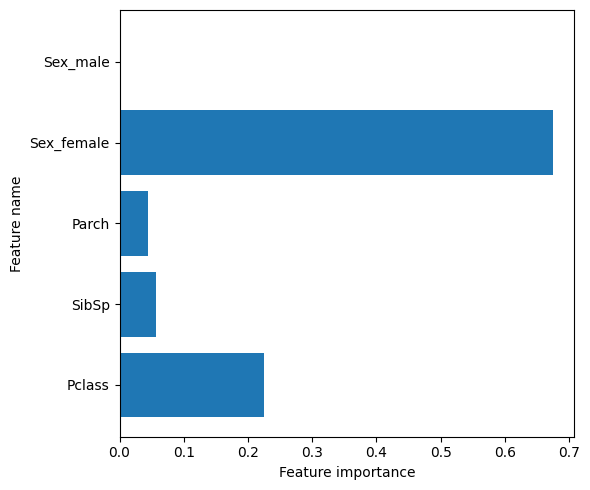

In [16]:
import matplotlib.pyplot as plt

def plot_feature_importance(df_train):
    y = df_train['Survived']
    features = ["Pclass", "Sex", "SibSp", "Parch"]
    X = pd.get_dummies(df_train[features])

    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X, y)

    importances = clf.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(6, 5))
    plt.barh(feature_names, importances)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.tight_layout()
    plt.show()

plot_feature_importance(df_train)